Hcokey Rink for Shot Tracking

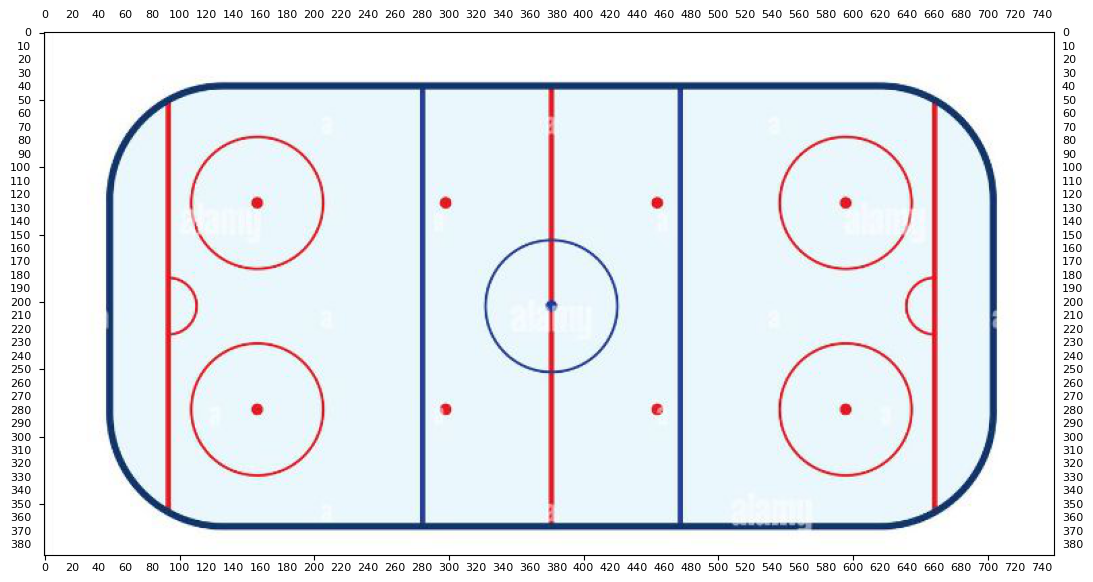

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import mplcursors
import pandas as pd

# Load the image
img = mpimg.imread('C:/Users/loutz/Flyers_Youth/Flyers_Youth/resources/rink_image.jpg') 

# Create a figure with the size of a landscape letter page (11 inches x 8.5 inches)
fig, ax = plt.subplots(figsize=(11, 8.5))  # Letter size in landscape mode

# Display the image
ax.imshow(img)

# Get the dimensions of the image
height, width, _ = img.shape

# Set gridline spacing (e.g., every 100 pixels for X and every 50 pixels for Y)
grid_spacing_x = 20
grid_spacing_y = 10

# Add X coordinates on the top and bottom of the image
for x in np.arange(0, width, grid_spacing_x):
    ax.text(x, -10, f'{x}', color='black', fontsize=8, ha='center', va='bottom')  # Top coordinates
    ax.text(x, height + 5, f'{x}', color='black', fontsize=8, ha='center', va='top')  # Bottom coordinates

# Add Y coordinates on the left and right of the image
for y in np.arange(0, height, grid_spacing_y):
    ax.text(-10, y, f'{y}', color='black', fontsize=8, ha='right', va='center')  # Left coordinates
    ax.text(width + 5, y, f'{y}', color='black', fontsize=8, ha='left', va='center')  # Right coordinates

# Remove axis labels and ticks
ax.set_xticklabels([])
ax.set_yticklabels([])

# Define a list to store the shot coordinates
shot_coordinates = []

# Define a function to handle mouse click events
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        shot_coordinates.append((int(event.xdata), int(event.ydata)))
        print(f"Shot on goal recorded at: ({int(event.xdata)}, {int(event.ydata)})")

# Connect the mouse click event to the function
cid = fig.canvas.mpl_connect('button_press_event', onclick)

# Adjust layout to fit the resized image
plt.tight_layout()

# Save the modified image
plt.savefig('hockey_rink_with_shots.jpg', dpi=300)

# Show the final image with shots on goal recording functionality
plt.show()

# Save shot coordinates to a .csv file
df = pd.DataFrame(shot_coordinates, columns=['X', 'Y'])
df.to_csv('shot_coordinates.csv', index=False)

In [ ]:
pip install mplcursors